In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [31]:
dimensions = 3
max_p = 6
incoming_edges = 3

In [32]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [33]:
_, graphs, times, bics = pc_incremental(partial_corr_test, ts, 0.05, 10, verbose=True)

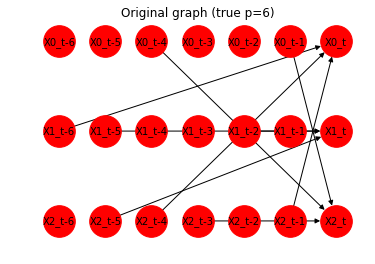

In [34]:
plt.title('Original graph (true p=6)')
generator.draw_graph()

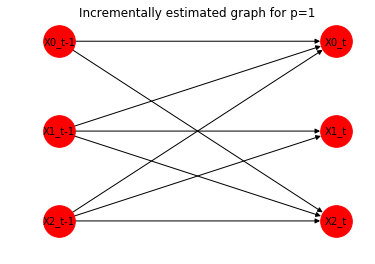

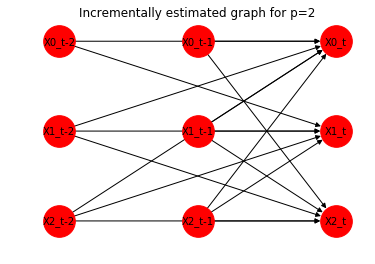

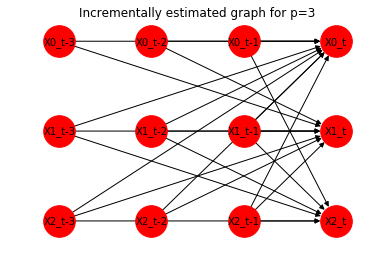

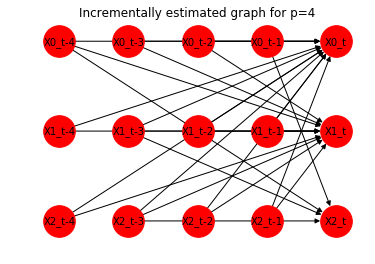

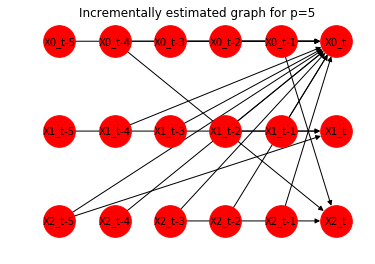

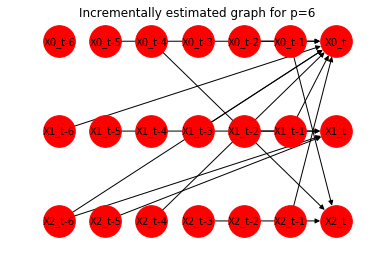

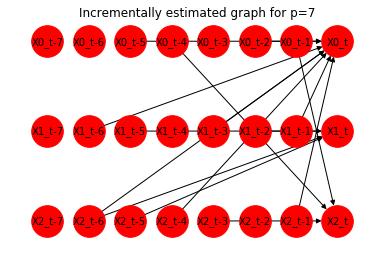

In [35]:
for p, g in graphs.items():   
    plt.title("Incrementally estimated graph for p="+str(p))
    draw_graph(g, dimensions, p)

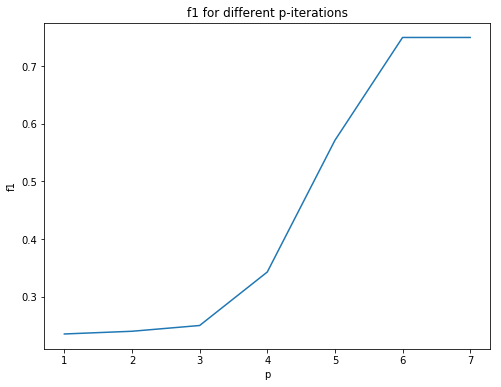

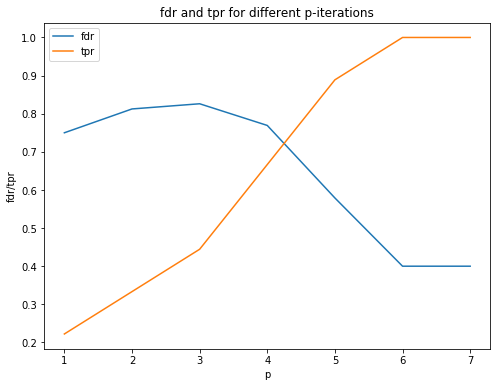

In [36]:
ps = []
f1 = []
fdr = []
tpr = []
for p, g in graphs.items():
    ps.append(p)
    f1.append(evaluate_edges(generator.graph, g)['f1-score'])
    fdr.append(evaluate_edges(generator.graph, g)['FDR'])
    tpr.append(evaluate_edges(generator.graph, g)['TPR'])

plt.figure(figsize=(8,6))
plt.title('f1 for different p-iterations')
plt.xlabel('p')
plt.ylabel('f1')
plt.plot(ps, f1)
plt.show()

plt.figure(figsize=(8,6))
plt.title('fdr and tpr for different p-iterations')
plt.xlabel('p')
plt.ylabel('fdr/tpr')
plt.plot(ps, fdr, label='fdr')
plt.plot(ps, tpr, label='tpr')
plt.legend()
plt.show()

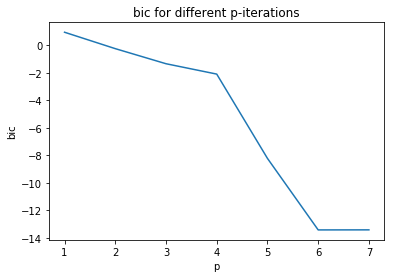

In [37]:
plt.title('bic for different p-iterations')
plt.xlabel('p')
plt.ylabel('bic')
plt.plot(list(bics.keys()), list(bics.values()))
plt.show()

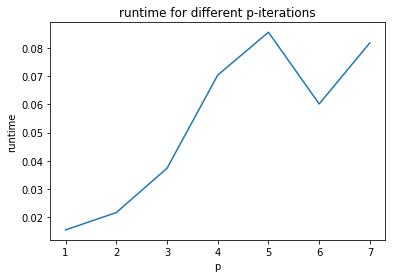

In [38]:
plt.title('runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), list(times.values()))
plt.show()

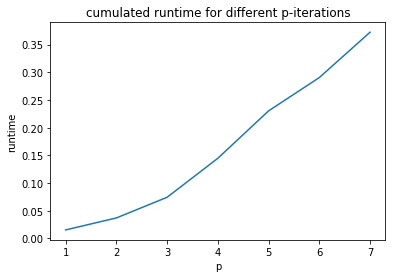

In [39]:
plt.title('cumulated runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), np.cumsum(list(times.values())))
plt.show()

0.9263178229504915
29
-0.27649462329098284
37
-1.3826379337021648
44
-2.1422231242614296
47
-8.267865288963211
40
-13.468594790028629
36
-13.466911758846273
39


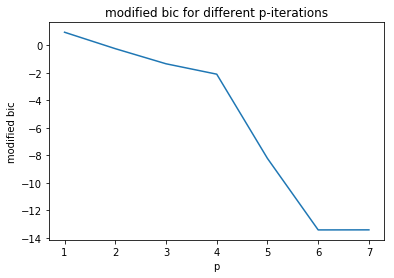

{1: 0.9530301912515515, 2: -0.24241028712144694, 3: -1.3421015953620072, 4: -2.0989190832728464, 5: -8.231007499080532, 6: -13.43541982035597, 7: -13.430969002422014}


In [40]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('bic', free_params=free_params)
plt.title('modified bic for different p-iterations')
plt.ylabel('modified bic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

0.9263178229504915
29
-0.27649462329098284
37
-1.3826379337021648
44
-2.1422231242614296
47
-8.267865288963211
40
-13.468594790028629
36
-13.466911758846273
39


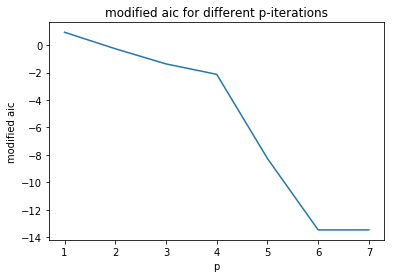

{1: 0.9321184030084972, 2: -0.26909314299492365, 3: -1.3738352929099271, 4: -2.1328193627568277, 5: -8.259861286962211, 6: -13.461390467435072, 7: -13.459106295021595}


In [41]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('aic', free_params=free_params)
plt.title('modified aic for different p-iterations')
plt.ylabel('modified aic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

0.9263178229504915
29
-0.27649462329098284
37
-1.3826379337021648
44
-2.1422231242614296
47
-8.267865288963211
40
-13.468594790028629
36
-13.466911758846273
39


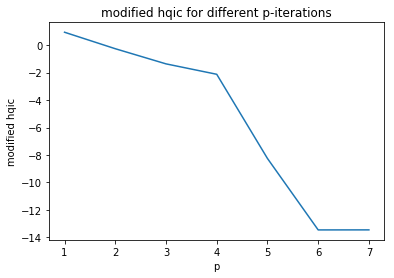

{1: 0.9391969433632756, 2: -0.26006107892176134, 3: -1.3630934811523943, 4: -2.121344109002819, 5: -8.25009422339437, 6: -13.452599308928216, 7: -13.44958167173772}


In [42]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('hqic', free_params=free_params)
plt.title('modified hqic for different p-iterations')
plt.ylabel('modified hqic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)